In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
dataset = pd.read_csv("cruise_ship_info.csv")
dataset.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [7]:
dataset.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


### Observations
1. No empty columns
2. 

In [25]:
y = dataset.pop("crew").values
y

array([ 3.55,  3.55,  6.7 , 19.1 , 10.  ,  9.2 ,  9.2 ,  9.2 ,  9.2 ,
       11.5 , 11.6 ,  6.6 ,  9.2 ,  9.2 ,  9.3 , 11.6 , 10.3 ,  9.2 ,
        9.3 ,  9.2 , 10.29, 10.  , 11.6 , 11.5 ,  8.58,  9.99,  9.09,
        9.99,  9.09,  9.99,  6.7 ,  9.99,  0.6 ,  6.7 ,  4.  ,  9.2 ,
        6.17,  6.36, 10.68, 10.68,  3.85,  9.2 ,  6.  , 10.9 ,  7.66,
        6.36,  5.45,  9.21, 12.53,  9.  ,  9.45,  9.45,  6.  ,  8.  ,
        5.57,  5.3 ,  8.42,  4.6 ,  6.44,  5.88,  5.88,  5.88,  5.61,
        6.12,  5.31,  8.  ,  7.  , 13.13,  7.  ,  5.35,  9.87,  7.4 ,
        2.97,  7.6 ,  4.7 , 11.  ,  6.14, 11.09, 11.  ,  4.38,  8.  ,
       10.  ,  6.3 , 13.  ,  3.8 ,  9.59,  6.14,  4.  ,  4.  ,  4.  ,
        3.5 ,  8.69,  5.2 ,  8.5 ,  9.  ,  7.94, 12.2 , 11.  ,  9.  ,
       12.  ,  9.  , 12.38, 12.  , 11.  , 11.1 ,  9.  ,  3.73,  6.96,
        5.2 , 12.38,  9.  , 12.  ,  9.  ,  3.73,  1.46,  4.45,  3.24,
        2.11,  4.47, 11.85,  8.48,  6.71,  7.6 , 11.76, 13.6 ,  7.6 ,
       13.6 ,  8.69,

In [26]:
X = dataset.drop(columns=["Ship_name", "Cruise_line"]).values

In [27]:
X

array([[  6.   ,  30.277,   6.94 ,   5.94 ,   3.55 ,  42.64 ],
       [  6.   ,  30.277,   6.94 ,   5.94 ,   3.55 ,  42.64 ],
       [ 26.   ,  47.262,  14.86 ,   7.22 ,   7.43 ,  31.8  ],
       [ 11.   , 110.   ,  29.74 ,   9.53 ,  14.88 ,  36.99 ],
       [ 17.   , 101.353,  26.42 ,   8.92 ,  13.21 ,  38.36 ],
       [ 22.   ,  70.367,  20.52 ,   8.55 ,  10.2  ,  34.29 ],
       [ 15.   ,  70.367,  20.52 ,   8.55 ,  10.2  ,  34.29 ],
       [ 23.   ,  70.367,  20.56 ,   8.55 ,  10.22 ,  34.23 ],
       [ 19.   ,  70.367,  20.52 ,   8.55 ,  10.2  ,  34.29 ],
       [  6.   , 110.239,  37.   ,   9.51 ,  14.87 ,  29.79 ],
       [ 10.   , 110.   ,  29.74 ,   9.51 ,  14.87 ,  36.99 ],
       [ 28.   ,  46.052,  14.52 ,   7.27 ,   7.26 ,  31.72 ],
       [ 18.   ,  70.367,  20.52 ,   8.55 ,  10.2  ,  34.29 ],
       [ 17.   ,  70.367,  20.52 ,   8.55 ,  10.2  ,  34.29 ],
       [ 11.   ,  86.   ,  21.24 ,   9.63 ,  10.62 ,  40.49 ],
       [  8.   , 110.   ,  29.74 ,   9.51 ,  14.87 ,  3

Reason for dropping Ship_name and Cruise_line columns is because our target data is a measure of size/weight & ship name or the ship's journey path does not directly affect the target data.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [36]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test = y_scaler.transform(y_test.reshape(-1, 1))
y_train, y_test = y_train.reshape(-1), y_test.reshape(-1)

In [47]:
# importing machine learning models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [44]:
from sklearn.metrics import mean_squared_error

In [64]:
def linear_regression_model(Model):
    linear_regression = Model()
    linear_regression.fit(X_train, y_train)
    predicted = linear_regression.predict(X_test)
    # mean squared error to validate test prediction
    train_rmse = np.sqrt(mean_squared_error(y_train, linear_regression.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
    print(train_rmse, test_rmse)

In [65]:
# Linear Regression Model
# Linear Regression without regularizer
linear_regression_model(LinearRegression)

0.33071448801231734 0.18548272048641154


In [66]:
# Linear Regression with L1 regularizer
linear_regression_model(Lasso)

0.9999999999999999 1.058172036323068


In [67]:
# Linear Regression with L2 regularizer
linear_regression_model(Ridge)

0.33422839207103117 0.18216388192098165


In [68]:
# Linear Regression with L1 & L2 regularizer
linear_regression_model(ElasticNet)

0.6769174557521043 0.6783528685471576


In [76]:
# Random Forest Regression
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
predicted = random_forest.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, random_forest.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
print(train_rmse, test_rmse)

0.14450669067544625 0.3461098704559978


In [77]:
# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
predicted = svr.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, svr.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
print(train_rmse, test_rmse)

0.3173831935334568 0.5331895835363878


In [78]:
# Gradient Bosting Regression
gboost = GradientBoostingRegressor()
gboost.fit(X_train, y_train)
predicted = gboost.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, gboost.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, predicted))
print(train_rmse, test_rmse)

0.053041820263225854 0.3463119057505239


After Considering different models
I am going with Linear Regression without Regularizer because the test root mean squared error is lesser that the train root mean squared and is less compared to the rest

          0         1         2         3         4         5
0  1.000000 -0.567475 -0.466363 -0.468890 -0.451450 -0.274497
1 -0.567475  1.000000  0.934056  0.933607  0.933361 -0.154261
2 -0.466363  0.934056  1.000000  0.882173  0.967621 -0.414404
3 -0.468890  0.933607  0.882173  1.000000  0.891176 -0.221232
4 -0.451450  0.933361  0.967621  0.891176  1.000000 -0.374341
5 -0.274497 -0.154261 -0.414404 -0.221232 -0.374341  1.000000


<AxesSubplot:>

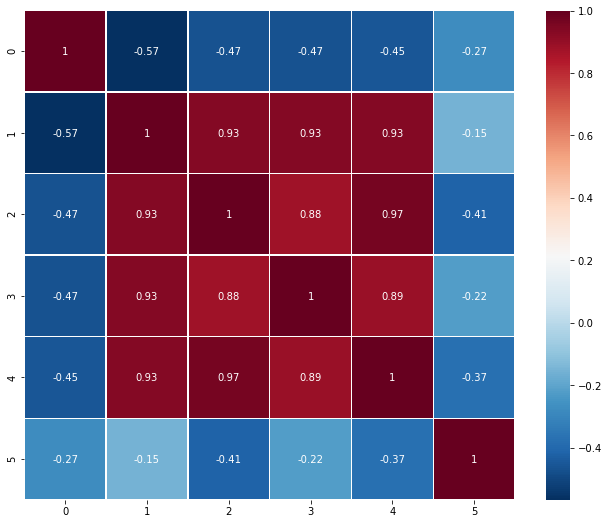

In [95]:
import seaborn as sns
x_train_df = pd.DataFrame(X_train)
corr = x_train_df.corr()
print(corr)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

          0         1         2         3         4         5
0  1.000000 -0.675546 -0.600344 -0.637767 -0.607355 -0.288518
1 -0.675546  1.000000  0.963358  0.904675  0.967818  0.124742
2 -0.600344  0.963358  1.000000  0.885135  0.993973 -0.108059
3 -0.637767  0.904675  0.885135  1.000000  0.884599  0.090076
4 -0.607355  0.967818  0.993973  0.884599  1.000000 -0.078491
5 -0.288518  0.124742 -0.108059  0.090076 -0.078491  1.000000


<AxesSubplot:>

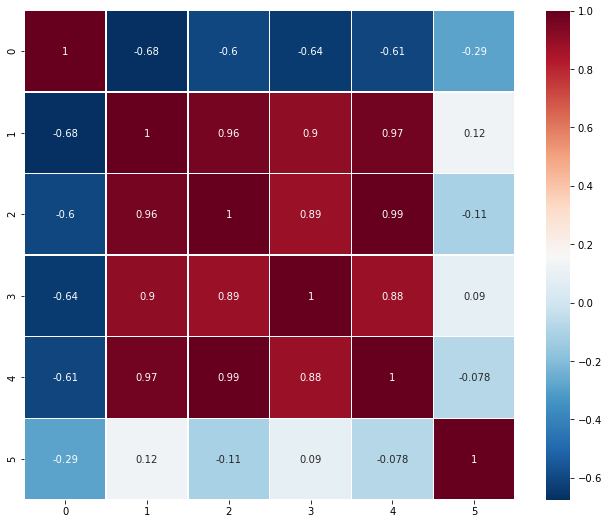

In [97]:
x_test_df = pd.DataFrame(X_test)
corr = x_test_df.corr()
print(corr)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

For the model I selected (Linear Regression) the hyper parameters are number of iterations, learning rate

I would use GridSearch method to select the best hyperparemeters